# Exp 01. 가위바위보 분류기

### 라이브러리 불러오기

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import glob

### 이미지 전처리 

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 224x224 사이즈로 바꾸어 저장합니다.
	target_size=(224,224)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = "./rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = "./paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

401  images to be resized.
401  images resized.
가위 이미지 resize 완료!
401  images to be resized.
401  images resized.
바위 이미지 resize 완료!
401  images to be resized.
401  images resized.
보 이미지 resize 완료!


In [3]:
def load_data(img_path, number_of_data=1203):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "."
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 1203 입니다.
x_train shape: (1203, 224, 224, 3)
y_train shape: (1203,)


라벨:  0


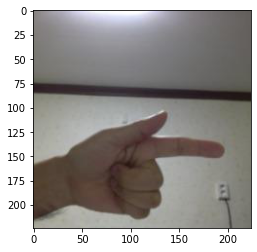

In [4]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 모델 생성

In [5]:
# 동일한 결과 출력을 위한 seed 설정
tf.random.set_seed(42)

In [6]:
n_channel_1 = 64
n_channel_2 = 128
n_channel_3 = 256
n_dense = 256
epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(n_channel_3, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 128)       0

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=epoch)

Epoch 1/10
38/38 [==============================] - 8s 73ms/step - loss: 2.8317 - accuracy: 0.4065
Epoch 2/10
38/38 [==============================] - 2s 56ms/step - loss: 0.8943 - accuracy: 0.5769
Epoch 3/10
38/38 [==============================] - 2s 55ms/step - loss: 0.6855 - accuracy: 0.7016
Epoch 4/10
38/38 [==============================] - 2s 56ms/step - loss: 0.4669 - accuracy: 0.8163
Epoch 5/10
38/38 [==============================] - 2s 55ms/step - loss: 0.3174 - accuracy: 0.8786
Epoch 6/10
38/38 [==============================] - 2s 56ms/step - loss: 0.2390 - accuracy: 0.9044
Epoch 7/10
38/38 [==============================] - 2s 55ms/step - loss: 0.1711 - accuracy: 0.9360
Epoch 8/10
38/38 [==============================] - 2s 56ms/step - loss: 0.1105 - accuracy: 0.9667
Epoch 9/10
38/38 [==============================] - 2s 55ms/step - loss: 0.0766 - accuracy: 0.9701
Epoch 10/10
38/38 [==============================] - 2s 55ms/step - loss: 0.0427 - accuracy: 0.9884


### 성능 테스트

In [8]:
image_dir_path = "./test"
(x_test, y_test)=load_data(image_dir_path, 160)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 160 입니다.
x_test shape: (160, 224, 224, 3)
y_test shape: (160,)


In [9]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

5/5 - 0s - loss: 0.3696 - accuracy: 0.9125 - 218ms/epoch - 44ms/step
test_loss: 0.36955779790878296 
test_accuracy: 0.9125000238418579


최종 테스트 정확도는 약 91% 정도이다.